# Community analysis with igraph
### Hugo Barbosa
```hbarbosa@pas.rochester.edu```

igraph has several community detection algorithms, covering a broad range of scenarios. 
* Hierarchical structures;
* Directed/undirected;
* Node and Edge weights;
* Signed (positive and negative weights);
* Large-scale;

<img src="community_algorithms.png"></img>

### Community detection algorithms - Summary
<img src="algorithms_summary.png"></img>

## Zachary's Karate club network

In [45]:
import igraph as ig
g = ig.Nexus.get('karate')
print g.summary()

IGRAPH UNW- 34 78 -- Zachary's karate club network
+ attr: Author (g), Citation (g), name (g), Faction (v), id (v), name (v), weight (e)


### Setting the  factions to nodes'   colors
* Faction 1: red
* Faction 2: green


In [46]:
faction_dict = {1.0:'red',2.0:'green'}
g.vs['color'] = [faction_dict[i] for i in g.vs['Faction']]

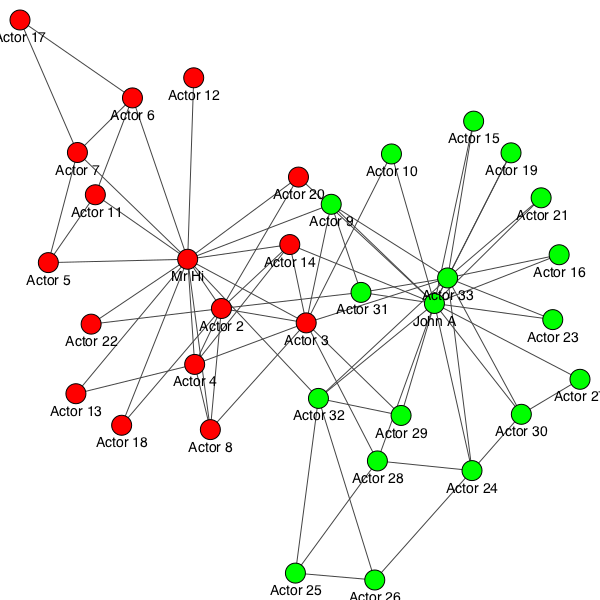

In [47]:
ig.plot(g,vertex_label=g.vs['name'],vertex_label_dist=1.2)

# Non-hierarchical community structures
## List of algorithms
* Infomap
* Spinglass
* Optimal modularity
* Label propagation
* Leading eigenvector

In [90]:
print cmm

Clustering with 34 elements and 3 clusters
[0] Mr Hi, Actor 2, Actor 3, Actor 4, Actor 8, Actor 12, Actor 13, Actor 14,
    Actor 18, Actor 20, Actor 22
[1] Actor 5, Actor 6, Actor 7, Actor 11, Actor 17
[2] Actor 9, Actor 10, Actor 15, Actor 16, Actor 19, Actor 21, Actor 23, Actor
    24, Actor 25, Actor 26, Actor 27, Actor 28, Actor 29, Actor 30, Actor 31,
    Actor 32, Actor 33, John A


In [94]:
cmm.membership

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

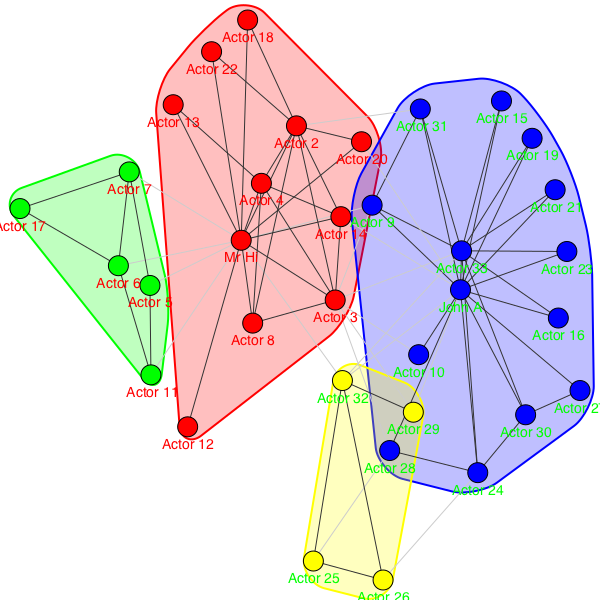

In [96]:
cmm = g.community_label_propagation(weights='weight')
ig.plot(cmm,
        mark_groups=True,
        vertex_label=g.vs['name'],
        vertex_label_color=g.vs['color'],
        vertex_label_dist=1.2)

## Inspecting the partitioning

### Modularity score

In [53]:
cmm.modularity

0.4345214669889994

### Communities' sizes

In [54]:
cmm.sizes()

[11, 5, 18]

In [28]:
print cmm.size_histogram()

N = 3, mean +- sd: 11.3333 +- 6.5064
[ 5,  6): * (1)
[ 6,  7):  (0)
[ 7,  8):  (0)
[ 8,  9):  (0)
[ 9, 10):  (0)
[10, 11):  (0)
[11, 12): * (1)
[12, 13):  (0)
[13, 14):  (0)
[14, 15):  (0)
[15, 16):  (0)
[16, 17):  (0)
[17, 18):  (0)
[18, 19): * (1)


# Comparing community partitionings 
Sometimes we want to get insights regarding the origins of the underlying community structure.

For the Karate Club network we know what the ground truth is.

In [56]:
print g.vs['Faction']

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


In [59]:
cmm.compare_to(g.vs['Faction'])

0.29227594096717424

## Comparing the communities produced by each algorithm with the ground truth

In [78]:
print g.community_infomap(edge_weights='weight').compare_to(g.vs['Faction'])
print g.community_spinglass(weights='weight').compare_to(g.vs['Faction'])
print g.community_optimal_modularity(weights='weight').compare_to(g.vs['Faction'])
print g.community_label_propagation(weights='weight').compare_to(g.vs['Faction'])
print g.community_leading_eigenvector(weights='weight').compare_to(g.vs['Faction'])

0.292275940967
0.572708634586
0.629254030064
0.292275940967
0.727812767442


In [30]:
print g.community_infomap(edge_weights='weight').modularity
print g.community_spinglass(weights='weight').modularity
print g.community_optimal_modularity(weights='weight').modularity
print g.community_label_propagation(weights='weight').modularity
print g.community_leading_eigenvector(weights='weight').modularity

0.434521466989
0.444903581267
0.444903581267
0.413832199546
0.436639118457


# Hierarchical algorithms
* Edge betweenness
* Fast greedy
* Walktrap
* Multilevel*

## Hierarchical algorithms return a VertexDendrogram object

In [67]:
cmm2 = g.community_fastgreedy(weights='weight')
print cmm2.summary()

Dendrogram, 34 elements, 33 merges


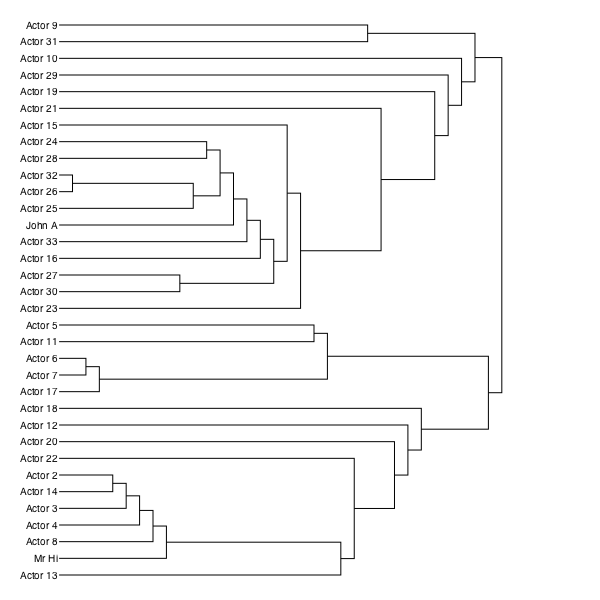

In [68]:
ig.plot(cmm2, vertex_label=g.vs['name'])

### Modularity

In [82]:
print g.community_edge_betweenness(weights='weight').as_clustering().modularity
print g.as_undirected().community_fastgreedy(weights='weight').as_clustering().modularity
print g.community_walktrap(weights='weight').as_clustering().modularity

0.345299001143
0.434521466989
0.44018103109


### Compare to the club fractions

In [83]:
print g.community_edge_betweenness(weights='weight').as_clustering().compare_to(g.vs['Faction'])
print g.as_undirected().community_fastgreedy(weights='weight').as_clustering().compare_to(g.vs['Faction'])
print g.community_walktrap(weights='weight').as_clustering().compare_to(g.vs['Faction'])

1.13554640307
0.292275940967
0.605074777231


### We can convert a VertexDendrogram to a VertexClustering object

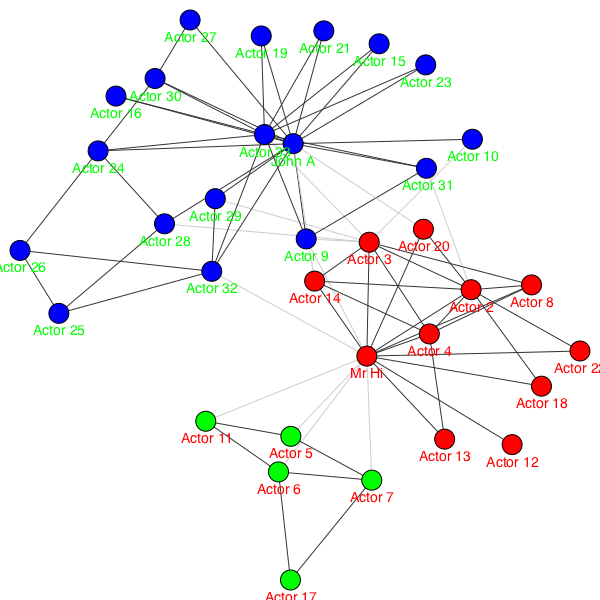

In [69]:
colors =  ['red' if i ==1 else 'green' for i in g.vs['Faction']]
ig.plot(cmm2.as_clustering(),vertex_label=g.vs['name'],
        vertex_label_color=colors,
        vertex_label_dist=1.2)

## From a VertexDendrogram we can choose the number of clusters

In [85]:
print cmm2.as_clustering(2)

Clustering with 34 elements and 2 clusters
[0] Mr Hi, Actor 2, Actor 3, Actor 4, Actor 5, Actor 6, Actor 7, Actor 8,
    Actor 11, Actor 12, Actor 13, Actor 14, Actor 17, Actor 18, Actor 20,
    Actor 22
[1] Actor 9, Actor 10, Actor 15, Actor 16, Actor 19, Actor 21, Actor 23, Actor
    24, Actor 25, Actor 26, Actor 27, Actor 28, Actor 29, Actor 30, Actor 31,
    Actor 32, Actor 33, John A


## Comparing with the ground truth

In [101]:
g.community_edge_betweenness(weights='weight').as_clustering(2).compare_to(g.vs['Faction'])

0.36852888376270454

In [ ]:
g.community_spinglass(implementation='neg')

In [84]:
print g.community_edge_betweenness(weights='weight').as_clustering(2).compare_to(g.vs['Faction'])
print g.as_undirected().community_fastgreedy(weights='weight').as_clustering(2).compare_to(g.vs['Faction'])
print g.community_walktrap(weights='weight').as_clustering(2).compare_to(g.vs['Faction'])

0.368528883763
0.0
0.0


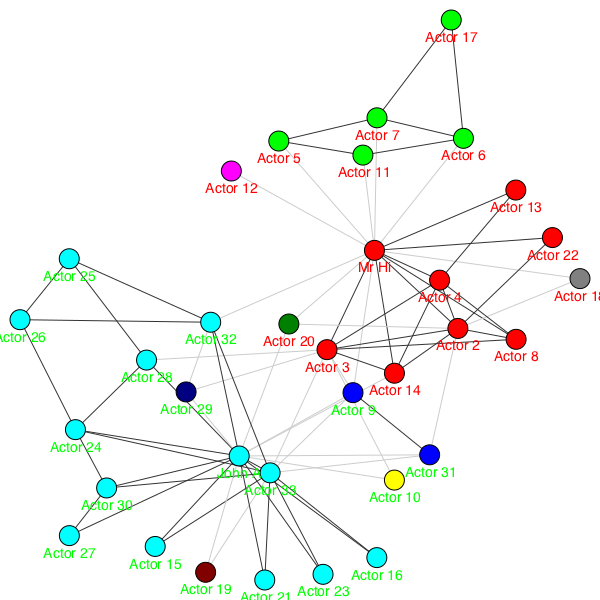

In [97]:
ig.plot(cmm2.as_clustering(10),vertex_label=g.vs['name'],
        vertex_label_color=colors,
        vertex_label_dist=1.2)

# Some algorithms have unique features
* Infomap: weighted nodes
* Spinglass: negative edge weights
* Fastgreedy: almost linear time
* Modularity optimization: numerical optimization

# Co-authorship in Network Science

In [103]:
net = ig.Nexus.get('netscience')
net.summary()

'IGRAPH UNW- 1589 2742 -- Coauthorships in network science\n+ attr: Author (g), Citation (g), Description (g), URL (g), name (g), id (v), name (v), weight (e)'

In [104]:
net_giant_component = net.components().giant()
cmm_net = net_giant_component.community_infomap(edge_weights='weight')


In [105]:
vertices_label_sizes = ig.rescale(net_giant_component.pagerank(weights=net_giant_component.es['weight']),out_range=(8,18))
vertices_sizes = ig.rescale(net_giant_component.pagerank(weights=net_giant_component.es['weight']),
                            out_range=(5,30))

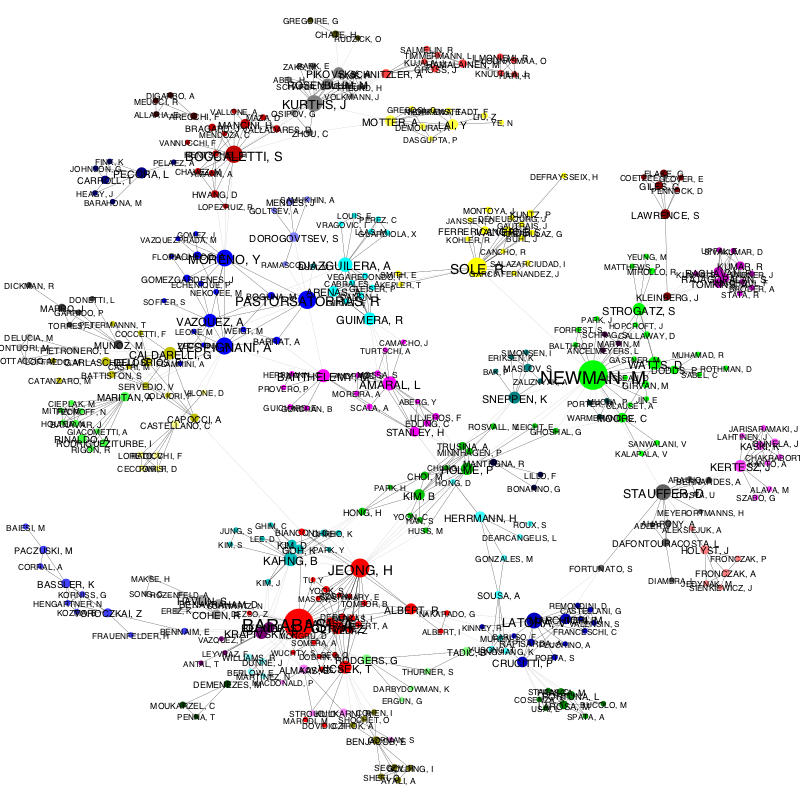

In [106]:
ig.plot(cmm_net,
            vertex_label=net_giant_component.vs['name'],
        vertex_frame_width=0,
        edge_width=0.3,
        vertex_label_size=vertices_label_sizes,
        vertex_size=vertices_sizes,
        bbox=(0,0,800,800),
#         mark_groups=True

       )

## Mobile phone calls between districts in Senegal

In [11]:
import pandas as pd
import igraph as ig
import numpy as np

In [25]:
m1 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/01_n_calls.graphml.xml',format='graphml')
m2 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/02_n_calls.graphml.xml',format='graphml')
m3 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/03_n_calls.graphml.xml',format='graphml')
m4 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/04_n_calls.graphml.xml',format='graphml')
m5 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/05_n_calls.graphml.xml',format='graphml')
m6 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/06_n_calls.graphml.xml',format='graphml')
m7 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/07_n_calls.graphml.xml',format='graphml')
m8 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/08_n_calls.graphml.xml',format='graphml')
m9 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/09_n_calls.graphml.xml',format='graphml')
m10 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/10_n_calls.graphml.xml',format='graphml')
m11 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/11_n_calls.graphml.xml',format='graphml')
m12 = ig.read('/Users/hugoserrano/Downloads/NetMob/networks/12_n_calls.graphml.xml',format='graphml')

In [26]:
m1.simplify(combine_edges='sum')
m2.simplify(combine_edges='sum')
m3.simplify(combine_edges='sum')
m4.simplify(combine_edges='sum')
m5.simplify(combine_edges='sum')
m6.simplify(combine_edges='sum')
m7.simplify(combine_edges='sum')
m8.simplify(combine_edges='sum')
m9.simplify(combine_edges='sum')
m10.simplify(combine_edges='sum')
m11.simplify(combine_edges='sum')
m12.simplify(combine_edges='sum')

In [39]:
cmm_m1 = m1.community_walktrap(weights='weight')
cmm_m2 = m2.community_walktrap(weights='weight')
cmm_m3 = m3.community_walktrap(weights='weight')
cmm_m4 = m4.community_walktrap(weights='weight')
cmm_m5 = m5.community_walktrap(weights='weight')
cmm_m6 = m6.community_walktrap(weights='weight')
cmm_m7 = m7.community_walktrap(weights='weight')
cmm_m8 = m8.community_walktrap(weights='weight')
cmm_m9 = m9.community_walktrap(weights='weight')
cmm_m10 = m10.community_walktrap(weights='weight')
cmm_m11 = m11.community_walktrap(weights='weight')
cmm_m12 = m12.community_walktrap(weights='weight')

# What could be driving the community structure?

In [28]:
tribes = pd.read_csv('/Users/hugoserrano/Downloads/NetMob/ethnicity_FINAL.csv')

In [29]:
tribes['tribeid'] = tribes.groupby(['g1shortnam'],sort=False).grouper.group_info[0]

In [30]:
tribes = tribes.groupby(['arr_id']).first()

In [42]:
print  cmm_m1.as_clustering(10).compare_to(tribes.ix[m1.vs['arr_id']]['tribeid'].tolist(),method='vi')
print  cmm_m2.as_clustering(10).compare_to(tribes.ix[m2.vs['arr_id']]['tribeid'].tolist(),method='vi')
print  cmm_m3.as_clustering(10).compare_to(tribes.ix[m3.vs['arr_id']]['tribeid'].tolist(),method='vi')
print  cmm_m4.as_clustering(10).compare_to(tribes.ix[m4.vs['arr_id']]['tribeid'].tolist(),method='vi')
print  cmm_m5.as_clustering(10).compare_to(tribes.ix[m5.vs['arr_id']]['tribeid'].tolist(),method='vi')
print  cmm_m6.as_clustering(10).compare_to(tribes.ix[m6.vs['arr_id']]['tribeid'].tolist(),method='vi')
print  cmm_m7.as_clustering(10).compare_to(tribes.ix[m7.vs['arr_id']]['tribeid'].tolist(),method='vi')
print  cmm_m8.as_clustering(10).compare_to(tribes.ix[m8.vs['arr_id']]['tribeid'].tolist(),method='vi')
print  cmm_m9.as_clustering(10).compare_to(tribes.ix[m9.vs['arr_id']]['tribeid'].tolist(),method='vi')
print cmm_m10.as_clustering(10).compare_to(tribes.ix[m10.vs['arr_id']]['tribeid'].tolist(),method='vi')
print cmm_m11.as_clustering(10).compare_to(tribes.ix[m11.vs['arr_id']]['tribeid'].tolist(),method='vi')
print cmm_m12.as_clustering(10).compare_to(tribes.ix[m12.vs['arr_id']]['tribeid'].tolist(),method='vi')


1.87825412636
1.99569218675
1.92268730912
1.93177756757
1.92248534922
1.934010349
1.89275062456
1.95510548157
1.82180825618
1.83541946656
1.80978791519
1.86463561052


In [539]:
cmms = [cmm_m1,cmm_m2,cmm_m3,cmm_m4,cmm_m5,cmm_m6,cmm_m7,cmm_m8,cmm_m9,cmm_m10,cmm_m11,cmm_m12    ]
ggs = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12]

In [542]:
i = 0
for c,g in zip(cmms,ggs):
    ig.plot(c.as_clustering(10),
            target = 'output_m_%d.png'%i,
            edge_width=0.1,edge_arrow_size=0.01,
            vertex_size=8,
            vertex_label_size=12,
            vertex_label = tribes.ix[g.vs['arr_id']]['g1shortnam'].values,
            bbox=(600,600),
            vertex_label_dist=1.2
           )
    i+=1